In [9]:
import pandas as pd
import os
import json

In [10]:
folder1 = '../logs/cond_a_film/hopper-medium-expert-v2/plans/'
folder2 = '../logs/cond_a_nofilm/hopper-medium-expert-v2/plans/'

In [11]:
# get all the file names
subfolders1 = os.listdir(folder1)
subfolders2 = os.listdir(folder2)

# get the sub names
subfolders1 = [os.path.join(folder1, f) for f in subfolders1]
subfolders2 = [os.path.join(folder2, f) for f in subfolders2]

# combine all
subfolders = subfolders1 + subfolders2
print(subfolders)

['../logs/cond_a_film/hopper-medium-expert-v2/plans/H16_T10_w0.7_m0.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H16_T20_w1.5_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H32_T40_w3.0_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H32_T20_w0.7_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H64_T20_w0.7_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H64_T40_w1.5_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H16_T10_w3.0_m0.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H64_T20_w0.5_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H64_T10_w0.7_m0.5', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H64_T20_w3.0_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H32_T10_w0.5_m1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H16_T20_w3.0_m0.5', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H32_T20_w3.0_m-1.0', '../logs/cond_a_film/hopper-medium-expert-v2/plans/H32_T10_w1.5_m-1.

In [12]:
def extract_settings(subfolder):
    parts = subfolder.split("_")
    H = int(parts[0][1:])
    T = int(parts[1][1:])
    w = float(parts[2][1:])
    m = float(parts[3][1:])

    return H, T, w, m

In [13]:
# get the data
data = []
for subfolder in subfolders:
    with open(os.path.join(subfolder, "rollout.json")) as f:
        curr_data = json.load(f)
        assert(curr_data["epoch_diffusion"] == 300000)
        H, T, w, m = extract_settings(subfolder.split("/")[-1])
        nofilm = "nofilm" in subfolder
        row = {
            "film": not nofilm,
            "horizon": H,
            "diffusion_steps": T,
            "guidance_weight": w,
            "ensemble_temperature": m,
            "mean_return": curr_data["mean_return"],
        }
        data.append(row)

In [14]:
# create the dataframe
df = pd.DataFrame(data)
df.head()

,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,mean_return
0,True,16,10,0.7,0.0,3559.188933
1,True,16,20,1.5,-1.0,3399.871762
2,True,32,40,3.0,-1.0,1133.218776
3,True,32,20,0.7,-1.0,3143.745476
4,True,64,20,0.7,-1.0,3230.597762


In [ ]:
# save df
df.to_csv("hopper_medium_expert_results.csv", index=False)

In [24]:
# sort by mean return
df = df.sort_values(by="mean_return", ascending=False)
df.head(10) # print the top 10 results

,film,horizon,diffusion_steps,guidance_weight,ensemble_temperature,mean_return
87,True,16,10,1.5,0.5,3621.327385
81,True,16,10,3.0,0.5,3609.260473
76,True,16,40,3.0,0.5,3607.093707
124,True,16,20,0.7,0.5,3577.734131
134,True,16,40,0.7,1.0,3577.666358
110,True,16,20,1.5,0.5,3574.984002
64,True,16,10,0.7,0.5,3574.513687
62,True,16,10,0.5,1.0,3570.439080
82,True,16,40,1.5,1.0,3564.511992
109,True,16,10,0.5,0.5,3563.817987


In [15]:
# compare film v no film
df.groupby("film")["mean_return"].mean()

film
False    2013.553774
True     2902.101057
Name: mean_return, dtype: float64

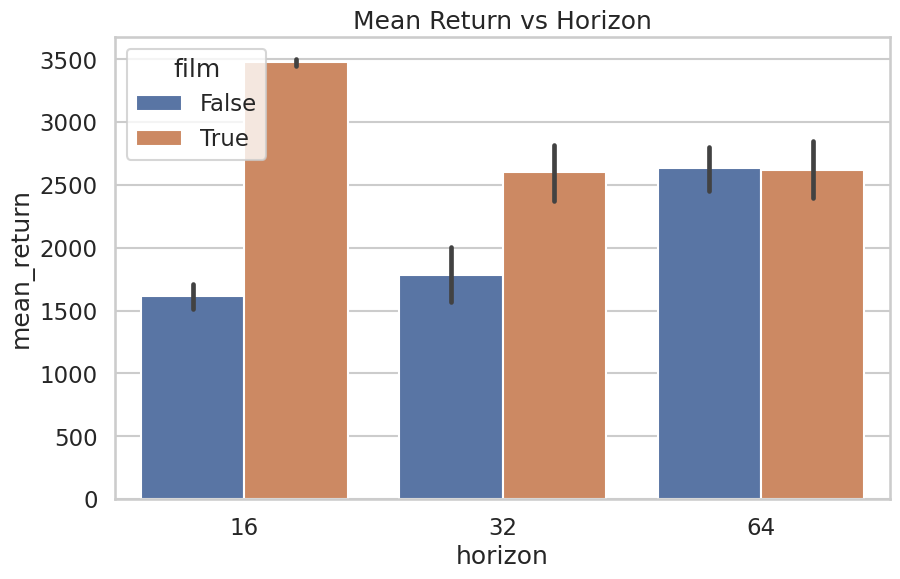

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="horizon", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Horizon")
plt.show()

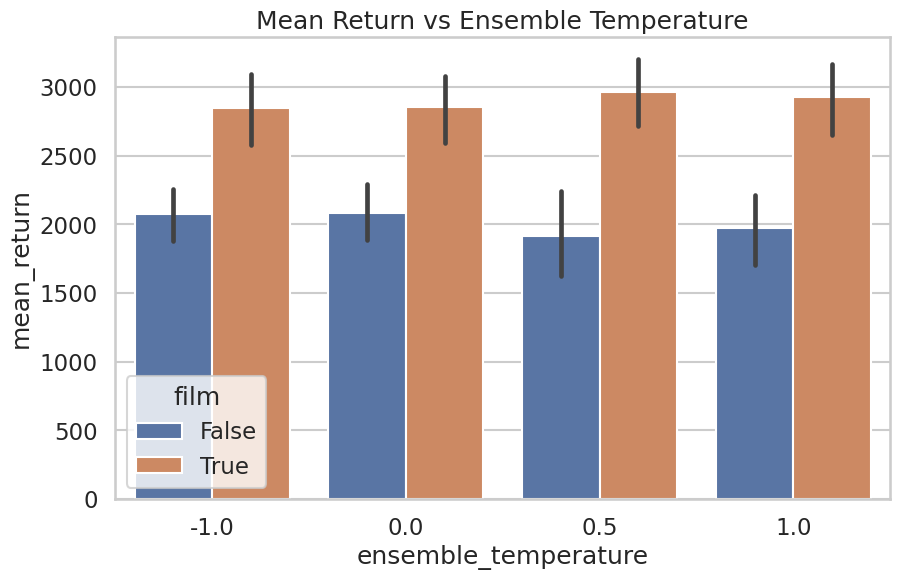

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="ensemble_temperature", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Ensemble Temperature")
plt.show()

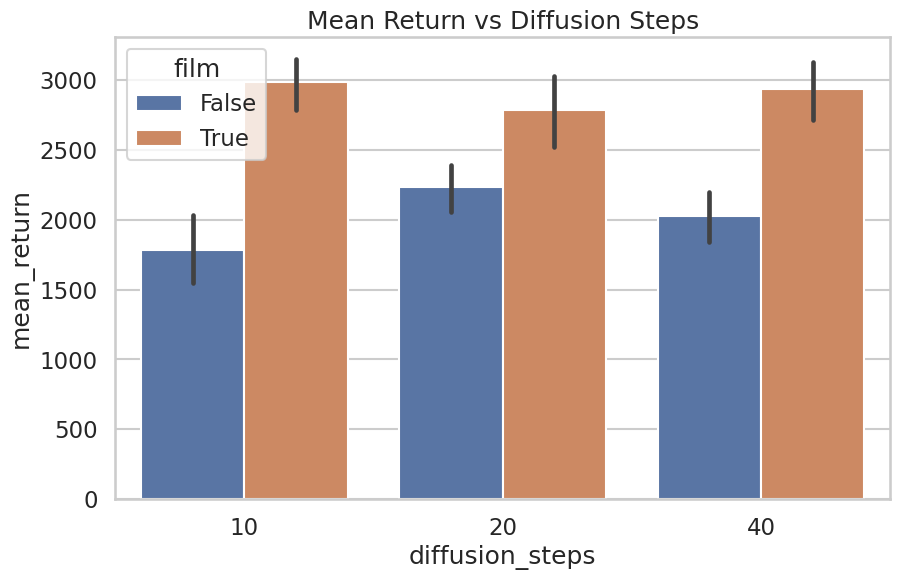

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="diffusion_steps", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Diffusion Steps")
plt.show()

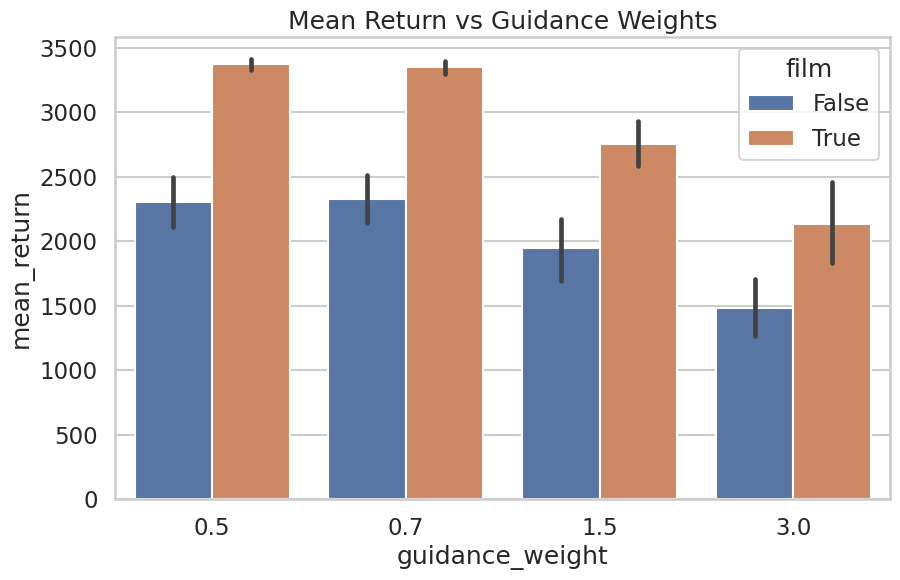

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10, 6))
sns.barplot(x="guidance_weight", y="mean_return", hue="film", data=df)
plt.title("Mean Return vs Guidance Weights")
plt.show()